<a href="https://www.kaggle.com/code/shruthiiiee/does-harvest-time-affect-orange-quality?scriptVersionId=169475305" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Hello! 🍊 
**Let's dive into uncovering the impact of harvesting days together!**

![](https://i.pinimg.com/originals/33/c8/3a/33c83aa561c44058657fc47b5b71e5d9.jpg)

# FLOW

1. Importing Libraries and Data
2. Data Understanding
3. Exploratory Data Analysis (EDA)
4. Data Cleaning
5. Data Visualization
6. Modeling and Model Evaluation
7. Conclusion

# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Data Understanding

In [2]:
data = pd.read_csv('/kaggle/input/orange-quality/Orange Quality Data.csv')
data.head(5)

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [4]:
data.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


In [5]:
data.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [6]:
for column in data.select_dtypes(include=['object']):
    print(f"{column}: {data[column].unique()}")

Color: ['Orange' 'Deep Orange' 'Light Orange' 'Orange-Red' 'Yellow-Orange']
Variety: ['Valencia' 'Navel' 'Cara Cara' 'Blood Orange' 'Hamlin' 'Tangelo (Hybrid)'
 'Murcott (Hybrid)' 'Moro (Blood)' 'Jaffa' 'Clementine' 'Washington Navel'
 'Star Ruby' 'Tangerine' 'Ambiance' 'California Valencia'
 'Honey Tangerine' 'Navel (Late Season)' 'Clementine (Seedless)' 'Temple'
 'Minneola (Hybrid)' 'Satsuma Mandarin' 'Midsweet (Hybrid)'
 'Navel (Early Season)' 'Ortanique (Hybrid)']
Blemishes (Y/N): ['N' 'Y (Minor)' 'Y (Sunburn)' 'Y (Mold Spot)' 'Y (Bruise)'
 'Y (Split Skin)' 'Y (Sunburn Patch)' 'Y (Scars)'
 'Y (Minor Insect Damage)' 'Y (Bruising)' 'N (Minor)' 'N (Split Skin)']


In [7]:
def describefreq(data, col_index):
    col_no = len(data.columns)
    row_no = len(data)
    
    data_types = {}
    for i in range(col_no):
        TYPE = type(data.iloc[:, i][0])
        data_types[i] = TYPE
        
    val_counts = {}
    for i in range(col_no):
        if data_types[i] == str:
            col = data.iloc[:, i]
            col_val_counts = col.value_counts()
            val_counts[i] = col_val_counts
    
    if col_index in val_counts:
        return pd.DataFrame(val_counts[col_index])
    else:
        return None

for i in range(len(data.columns)):
    df = describefreq(data, i)
    if df is not None:
        print(df)

               count
Color               
Deep Orange       75
Light Orange      64
Orange-Red        55
Orange            38
Yellow-Orange      9
                       count
Variety                     
Cara Cara                 21
Temple                    18
Star Ruby                 18
Navel                     16
Moro (Blood)              16
Tangerine                 14
Clementine                14
Washington Navel          14
Satsuma Mandarin          13
Ortanique (Hybrid)        13
Minneola (Hybrid)         12
Jaffa                     11
Ambiance                  11
Valencia                  11
California Valencia        7
Honey Tangerine            7
Hamlin                     5
Midsweet (Hybrid)          5
Clementine (Seedless)      4
Murcott (Hybrid)           3
Navel (Late Season)        3
Blood Orange               2
Navel (Early Season)       2
Tangelo (Hybrid)           1
                         count
Blemishes (Y/N)               
N                          149
Y (Sun

# EDA

In [8]:
colors = ['#38195b', '#60477c', '#88759d', '#afa3bd', '#d7d1de']
sns.set_palette(sns.color_palette(colors))

In [9]:
numeric_columns = data.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()

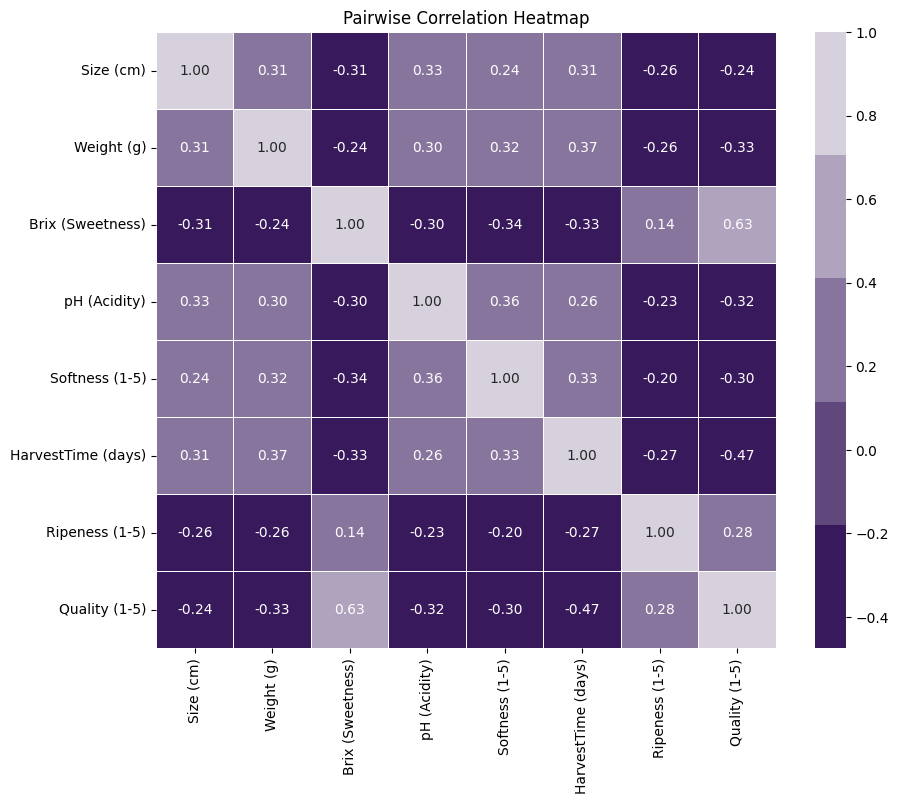

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=colors, fmt=".2f", linewidths=0.5)
plt.title('Pairwise Correlation Heatmap')
plt.show()

<Figure size 1200x1000 with 0 Axes>

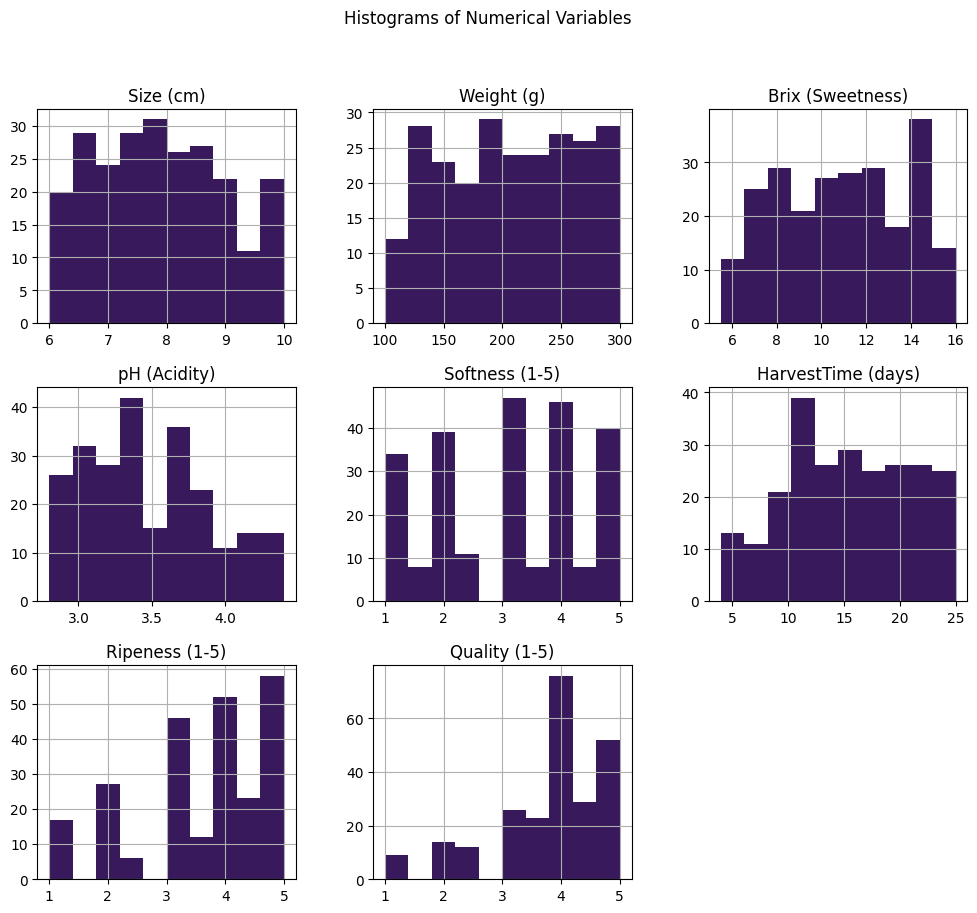

In [11]:
plt.figure(figsize=(12, 10))
data.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

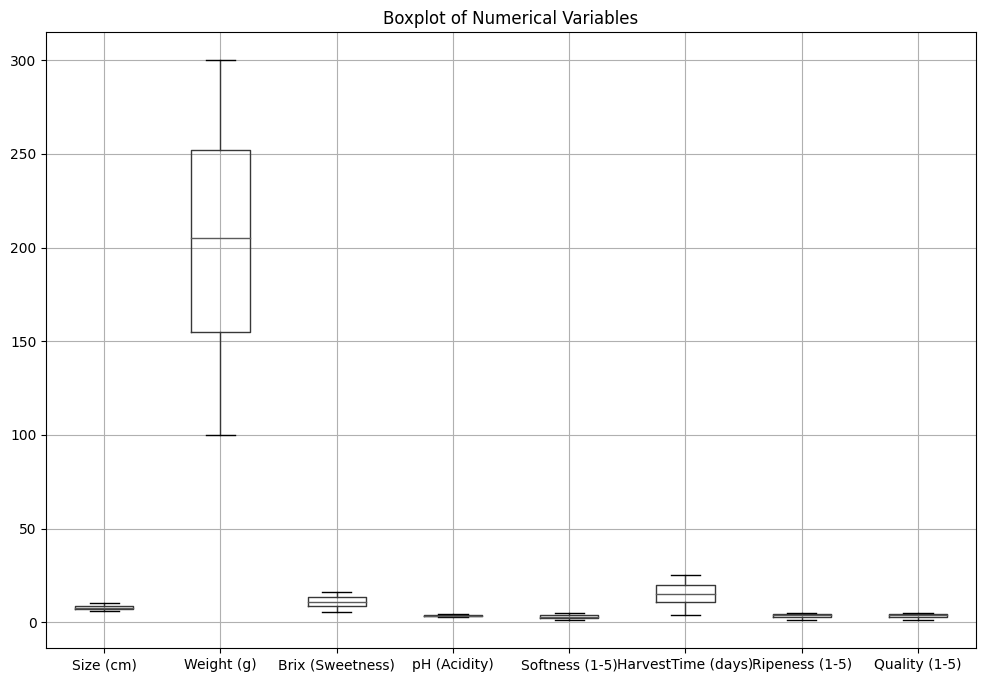

In [12]:
plt.figure(figsize=(12, 8))
data.boxplot(figsize=(12, 8))
plt.title('Boxplot of Numerical Variables')
plt.show()

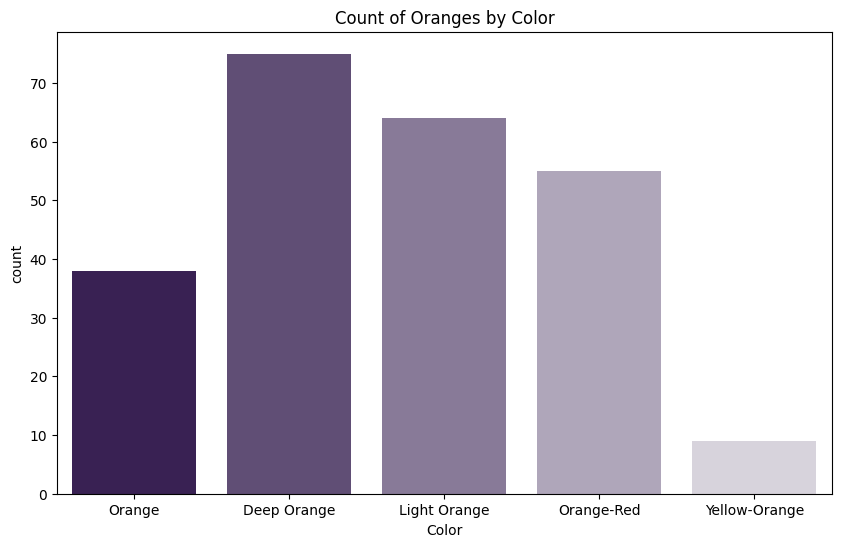

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Color')
plt.title('Count of Oranges by Color')
plt.show()

In [14]:
numerical_features = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)']
description = data[numerical_features].describe()
print(description)

        Size (cm)  Weight (g)  Brix (Sweetness)  pH (Acidity)  Softness (1-5)  \
count  241.000000  241.000000        241.000000    241.000000      241.000000   
mean     7.844813  205.128631         10.907884      3.473900        3.072614   
std      1.086002   56.461012          2.760446      0.421007        1.323630   
min      6.000000  100.000000          5.500000      2.800000        1.000000   
25%      6.900000  155.000000          8.500000      3.200000        2.000000   
50%      7.800000  205.000000         11.000000      3.400000        3.000000   
75%      8.700000  252.000000         13.400000      3.800000        4.000000   
max     10.000000  300.000000         16.000000      4.400000        5.000000   

       HarvestTime (days)  Ripeness (1-5)  
count          241.000000      241.000000  
mean            15.344398        3.599585  
std              5.323852        1.205214  
min              4.000000        1.000000  
25%             11.000000        3.000000  
50%   

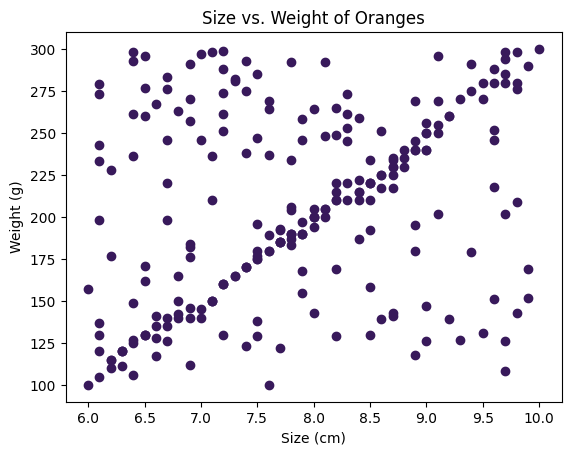

In [15]:
plt.scatter(data["Size (cm)"], data["Weight (g)"])
plt.xlabel("Size (cm)")
plt.ylabel("Weight (g)")
plt.title("Size vs. Weight of Oranges")
plt.show()

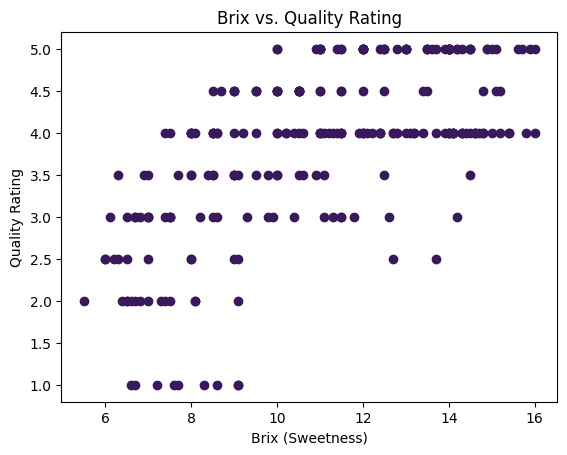

In [16]:
plt.scatter(data["Brix (Sweetness)"], data["Quality (1-5)"])
plt.xlabel("Brix (Sweetness)")
plt.ylabel("Quality Rating")
plt.title("Brix vs. Quality Rating")
plt.show()

# Data Cleaning

In [17]:
data['Blemish_Type'] = data['Blemishes (Y/N)'].str.extract(r'\((.*?)\)')
data['Blemishes (Y/N)'] = data['Blemishes (Y/N)'].str.replace(r'\(.*?\)', '').str.strip()
print(data.head())

   Size (cm)  Weight (g)  Brix (Sweetness)  pH (Acidity)  Softness (1-5)  \
0        7.5         180              12.0           3.2             2.0   
1        8.2         220              10.5           3.4             3.0   
2        6.8         150              14.0           3.0             1.0   
3        9.0         250               8.5           3.8             4.0   
4        8.5         210              11.5           3.3             2.5   

   HarvestTime (days)  Ripeness (1-5)         Color       Variety  \
0                  10             4.0        Orange      Valencia   
1                  14             4.5   Deep Orange         Navel   
2                   7             5.0  Light Orange     Cara Cara   
3                  21             3.5    Orange-Red  Blood Orange   
4                  12             5.0        Orange        Hamlin   

  Blemishes (Y/N)  Quality (1-5) Blemish_Type  
0               N            4.0          NaN  
1               N            4.5

In [18]:
data['Blemish_Type'] = data['Blemishes (Y/N)'].str.extract(r'\((.*?)\)')
data['Blemishes (Y/N)'] = data['Blemishes (Y/N)'].str.replace(r'\(.*?\)', '').str.strip()
data['Blemishes (Y/N)'] = data['Blemishes (Y/N)'].apply(lambda x: 'Y' if x.startswith('Y') else 'N')
print(data.head())

   Size (cm)  Weight (g)  Brix (Sweetness)  pH (Acidity)  Softness (1-5)  \
0        7.5         180              12.0           3.2             2.0   
1        8.2         220              10.5           3.4             3.0   
2        6.8         150              14.0           3.0             1.0   
3        9.0         250               8.5           3.8             4.0   
4        8.5         210              11.5           3.3             2.5   

   HarvestTime (days)  Ripeness (1-5)         Color       Variety  \
0                  10             4.0        Orange      Valencia   
1                  14             4.5   Deep Orange         Navel   
2                   7             5.0  Light Orange     Cara Cara   
3                  21             3.5    Orange-Red  Blood Orange   
4                  12             5.0        Orange        Hamlin   

  Blemishes (Y/N)  Quality (1-5) Blemish_Type  
0               N            4.0          NaN  
1               N            4.5

In [19]:
columns_to_replace_nan = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 
                          'Softness (1-5)', 'Ripeness (1-5)', 'Quality (1-5)', 'Blemish_Type']

data[columns_to_replace_nan] = data[columns_to_replace_nan].fillna(0)


In [20]:
categorical_cols = ['Color', 'Variety', 'Blemishes (Y/N)', 'Blemish_Type']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Data Visualization 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


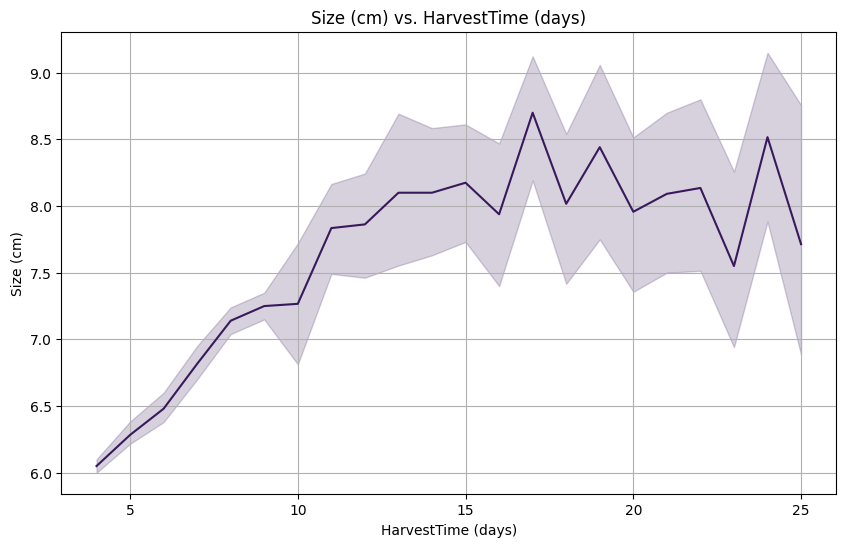

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='HarvestTime (days)', y='Size (cm)', data=data, color=colors[0])
plt.title('Size (cm) vs. HarvestTime (days)')
plt.xlabel('HarvestTime (days)')
plt.ylabel('Size (cm)')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


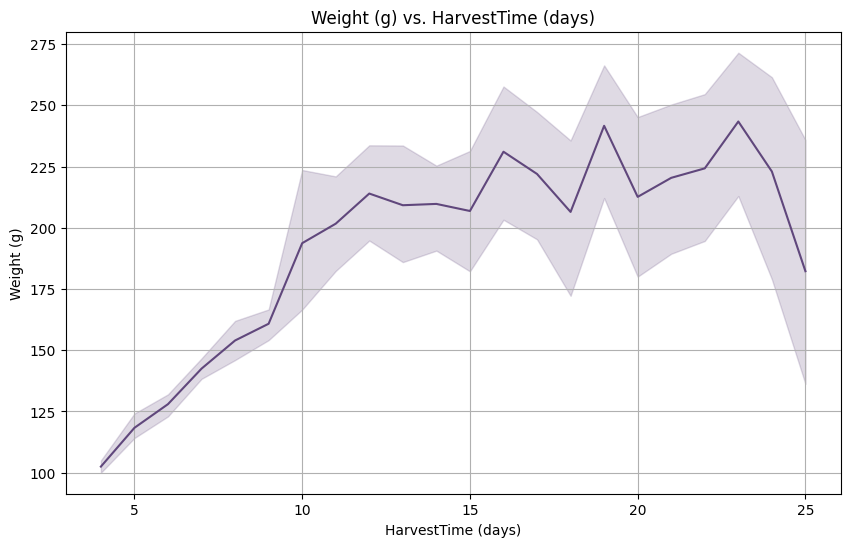

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='HarvestTime (days)', y='Weight (g)', data=data, color=colors[1])
plt.title('Weight (g) vs. HarvestTime (days)')
plt.xlabel('HarvestTime (days)')
plt.ylabel('Weight (g)')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


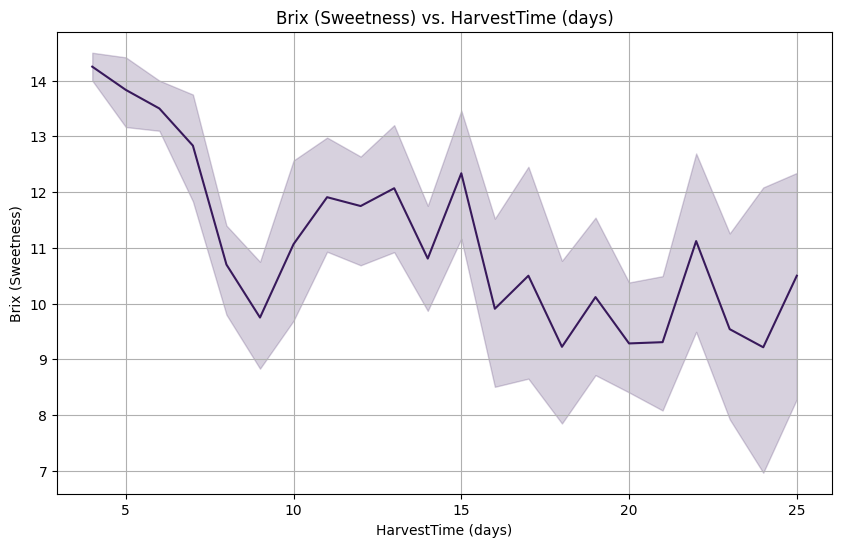

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='HarvestTime (days)', y='Brix (Sweetness)', data=data, color=colors[0])
plt.title('Brix (Sweetness) vs. HarvestTime (days)')
plt.xlabel('HarvestTime (days)')
plt.ylabel('Brix (Sweetness)')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


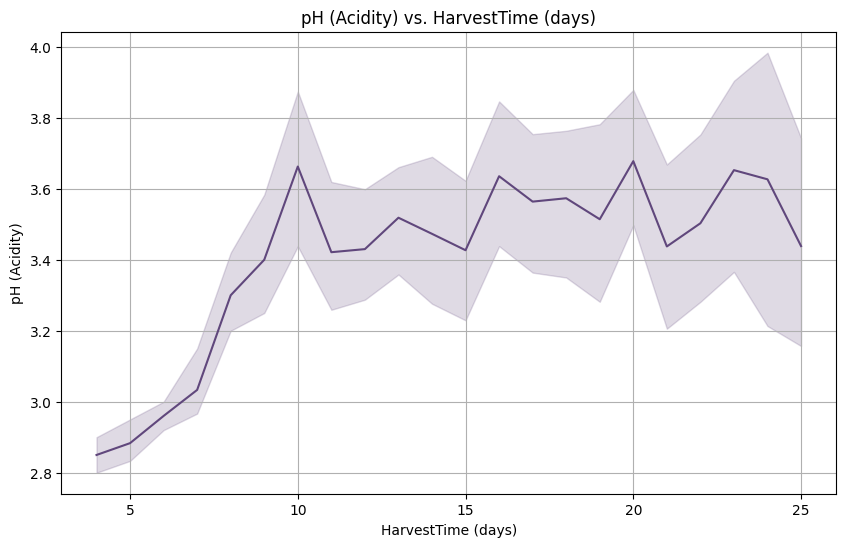

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='HarvestTime (days)', y='pH (Acidity)', data=data, color=colors[1])
plt.title('pH (Acidity) vs. HarvestTime (days)')
plt.xlabel('HarvestTime (days)')
plt.ylabel('pH (Acidity)')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


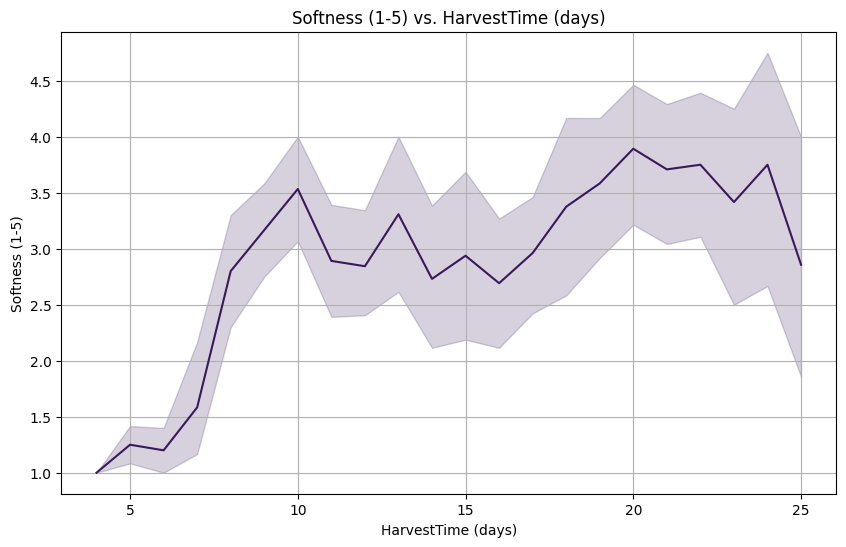

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='HarvestTime (days)', y='Softness (1-5)', data=data, color=colors[0])
plt.title('Softness (1-5) vs. HarvestTime (days)')
plt.xlabel('HarvestTime (days)')
plt.ylabel('Softness (1-5)')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


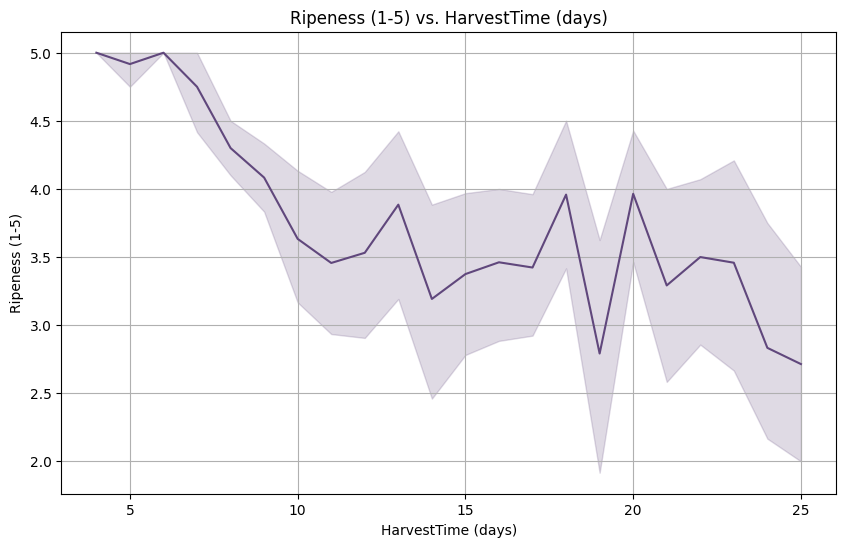

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='HarvestTime (days)', y='Ripeness (1-5)', data=data, color=colors[1])
plt.title('Ripeness (1-5) vs. HarvestTime (days)')
plt.xlabel('HarvestTime (days)')
plt.ylabel('Ripeness (1-5)')
plt.grid(True)
plt.show()

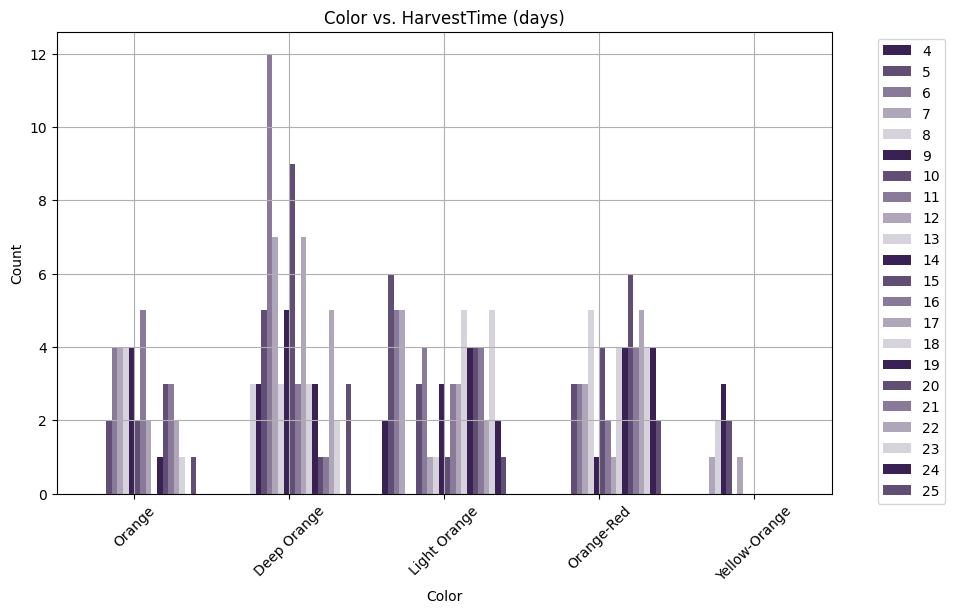

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Color', hue='HarvestTime (days)', data=data, palette=colors)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title('Color vs. HarvestTime (days)')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


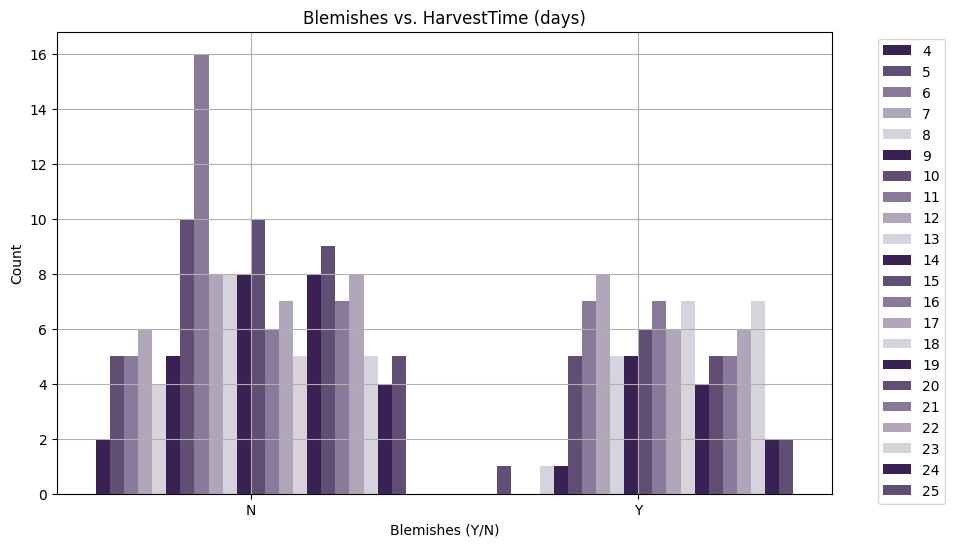

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Blemishes (Y/N)', hue='HarvestTime (days)', data=data, palette=colors)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title('Blemishes vs. HarvestTime (days)')
plt.xlabel('Blemishes (Y/N)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


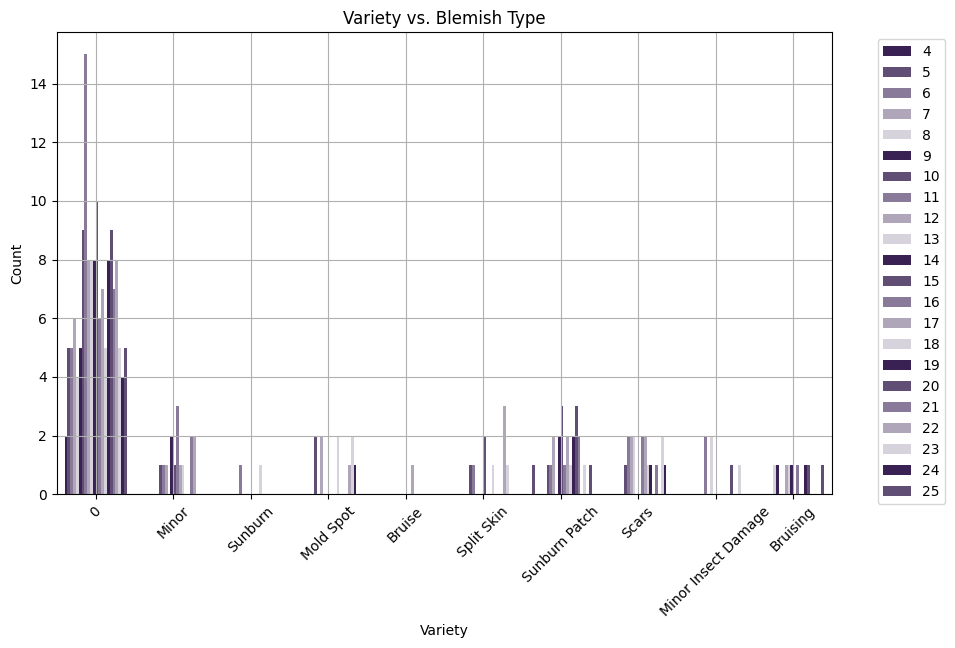

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Blemish_Type', hue='HarvestTime (days)', data=data, palette=colors)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title('Variety vs. Blemish Type')
plt.xlabel('Variety')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

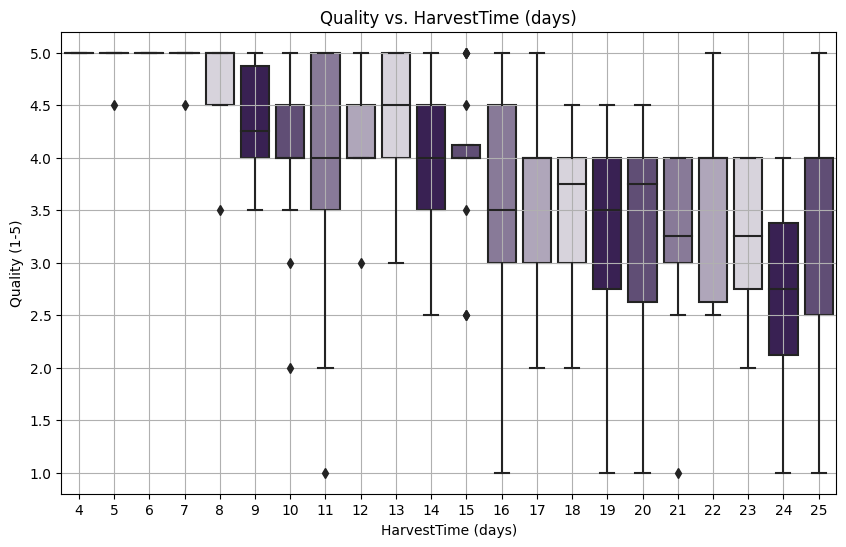

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HarvestTime (days)', y='Quality (1-5)', data=data, palette=colors)
plt.title('Quality vs. HarvestTime (days)')
plt.xlabel('HarvestTime (days)')
plt.ylabel('Quality (1-5)')
plt.grid(True)
plt.show()

# Modeling and Model Evaluation

In [31]:
X = data_encoded.drop(columns=['HarvestTime (days)'])
y = data_encoded['HarvestTime (days)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

coefficients = pd.DataFrame(model.coef_.reshape(1, -1), columns=X.columns)
coefficients = coefficients.T
coefficients.columns = ['Coefficient']

print("Coefficients:")
print(coefficients)

Mean Squared Error: 15.936498555523881
Coefficients:
                                   Coefficient
Size (cm)                         2.856973e-01
Weight (g)                        1.182785e-02
Brix (Sweetness)                 -1.259275e-01
pH (Acidity)                     -2.530897e+00
Softness (1-5)                    6.046069e-01
Ripeness (1-5)                   -4.724951e-01
Quality (1-5)                    -1.736140e+00
Color_Light Orange               -2.765274e+00
Color_Orange                     -3.685229e-01
Color_Orange-Red                  3.506592e-01
Color_Yellow-Orange              -8.693928e+00
Variety_Blood Orange              5.547302e+00
Variety_California Valencia      -4.757760e-01
Variety_Cara Cara                 1.659964e+00
Variety_Clementine                4.492240e+00
Variety_Clementine (Seedless)    -1.457590e+00
Variety_Hamlin                   -1.663393e+00
Variety_Honey Tangerine           2.579189e+00
Variety_Jaffa                     5.238971e+00
Variety

# **Conclusion:**

**Size and Weight:**
Attributes such as size and weight demonstrate a positive correlation with harvest time, suggesting an increase in fruit dimensions and mass as the harvest period progresses.

**Sweetness and Acidity:**
Brix (Sweetness) and pH (Acidity) exhibit negative correlations with harvest time, indicating a decrease in sweetness and acidity levels over the harvest duration.

**Softness and Ripeness:**
Softness and ripeness, measured on scales of 1-5, tend to increase with advancing harvest time, reflecting a trend towards greater maturity and readiness for consumption.

**Varietal Characteristics:**
Certain varieties, such as Blood Orange and Clementine, show higher coefficients, implying their suitability for later harvest stages, while others exhibit less pronounced effects.

**Quality Ratings:**
Quality ratings, assessed on a scale of 1-5, decline with prolonged harvest duration, suggesting potential compromises in overall fruit quality over time.

**Color Attributes:**
While certain color categories experience declines, others show less significant changes, indicating nuanced effects of harvest time on visual characteristics.

**Blemish Types:**
The prevalence of certain blemish types, such as bruising and minor insect damage, decreases with advancing harvest time, potentially improving visual appeal and marketability.

The discoveries presented here provide valuable guidance for agricultural decision-making, empowering farmers and producers to refine their harvest timing to align with desired quality attributes and market preferences. Additional exploration and validation of these trends hold the potential to improve agricultural practices and strategies for product management.

#### Your time spent exploring this notebook is valued! ˎˊ˗⋆｡°✩📄
#### If you've found it insightful and beneficial, please consider giving it an Upvote. Don't hesitate to share your analysis ideas in the comments below. Until next time, happy analyzing!💗